In [186]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
import pyspark.sql.functions as f
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

spark = SparkSession.builder.appName('722_bdas').getOrCreate()

In [187]:
# read in data

df = spark.read.options(inferSchema = True, header = True).csv('Life Expectancy Data.csv')

In [188]:
# check data amount

print(df.count(), len(df.columns))

2938 22


In [189]:
# check data types

df.printSchema()

root
 |-- Country: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Status: string (nullable = true)
 |-- Life expectancy : double (nullable = true)
 |-- Adult Mortality: integer (nullable = true)
 |-- infant deaths: integer (nullable = true)
 |-- Alcohol: double (nullable = true)
 |-- percentage expenditure: double (nullable = true)
 |-- Hepatitis B: integer (nullable = true)
 |-- Measles : integer (nullable = true)
 |--  BMI : double (nullable = true)
 |-- under-five deaths : integer (nullable = true)
 |-- Polio: integer (nullable = true)
 |-- Total expenditure: double (nullable = true)
 |-- Diphtheria : integer (nullable = true)
 |--  HIV/AIDS: double (nullable = true)
 |-- GDP: double (nullable = true)
 |-- Population: double (nullable = true)
 |--  thinness  1-19 years: double (nullable = true)
 |--  thinness 5-9 years: double (nullable = true)
 |-- Income composition of resources: double (nullable = true)
 |-- Schooling: double (nullable = true)



In [190]:
# check min and max values of each numeric column

from pyspark.sql.functions import *

for i in range(3,len(df.columns)):
    column = df.columns[i]
    df.agg(min(col(column)), max(col(column))).show()

+---------------------+---------------------+
|min(Life expectancy )|max(Life expectancy )|
+---------------------+---------------------+
|                 36.3|                 89.0|
+---------------------+---------------------+

+--------------------+--------------------+
|min(Adult Mortality)|max(Adult Mortality)|
+--------------------+--------------------+
|                   1|                 723|
+--------------------+--------------------+

+------------------+------------------+
|min(infant deaths)|max(infant deaths)|
+------------------+------------------+
|                 0|              1800|
+------------------+------------------+

+------------+------------+
|min(Alcohol)|max(Alcohol)|
+------------+------------+
|        0.01|       17.87|
+------------+------------+

+---------------------------+---------------------------+
|min(percentage expenditure)|max(percentage expenditure)|
+---------------------------+---------------------------+
|                        0.0|   

In [191]:
# get descriptive statistics

stats = df.describe().collect()
df.describe().show()

+-------+-----------+------------------+----------+-----------------+------------------+------------------+------------------+----------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+--------------------+---------------------+-------------------+-------------------------------+------------------+
|summary|    Country|              Year|    Status| Life expectancy |   Adult Mortality|     infant deaths|           Alcohol|percentage expenditure|       Hepatitis B|          Measles |              BMI |under-five deaths |             Polio| Total expenditure|      Diphtheria |          HIV/AIDS|               GDP|          Population| thinness  1-19 years| thinness 5-9 years|Income composition of resources|         Schooling|
+-------+-----------+------------------+----------+-----------------+------------------+------------------+------------------+------

In [192]:
stats[3].asDict()

{' BMI ': '1.0',
 ' HIV/AIDS': '0.1',
 ' thinness  1-19 years': '0.1',
 ' thinness 5-9 years': '0.1',
 'Adult Mortality': '1',
 'Alcohol': '0.01',
 'Country': 'Afghanistan',
 'Diphtheria ': '2',
 'GDP': '1.68135',
 'Hepatitis B': '1',
 'Income composition of resources': '0.0',
 'Life expectancy ': '36.3',
 'Measles ': '0',
 'Polio': '3',
 'Population': '34.0',
 'Schooling': '0.0',
 'Status': 'Developed',
 'Total expenditure': '0.37',
 'Year': '2000',
 'infant deaths': '0',
 'percentage expenditure': '0.0',
 'summary': 'min',
 'under-five deaths ': '0'}

In [193]:
stats[4].asDict()

{' BMI ': '87.3',
 ' HIV/AIDS': '50.6',
 ' thinness  1-19 years': '27.7',
 ' thinness 5-9 years': '28.6',
 'Adult Mortality': '723',
 'Alcohol': '17.87',
 'Country': 'Zimbabwe',
 'Diphtheria ': '99',
 'GDP': '119172.7418',
 'Hepatitis B': '99',
 'Income composition of resources': '0.948',
 'Life expectancy ': '89.0',
 'Measles ': '212183',
 'Polio': '99',
 'Population': '1.293859294E9',
 'Schooling': '20.7',
 'Status': 'Developing',
 'Total expenditure': '17.6',
 'Year': '2015',
 'infant deaths': '1800',
 'percentage expenditure': '19479.91161',
 'summary': 'max',
 'under-five deaths ': '2500'}

In [194]:
# uniform the column names for further use

df = df.withColumnRenamed('Life expectancy ', 'Life expectancy').\
withColumnRenamed('Measles ', 'Measles').\
withColumnRenamed(' BMI ', 'BMI').\
withColumnRenamed('under-five deaths ', 'under-five deaths').\
withColumnRenamed('Diphtheria ', 'Diphtheria').\
withColumnRenamed(' HIV/AIDS', 'HIV/AIDS').\
withColumnRenamed(' thinness  1-19 years', 'thinness  1-19 years').\
withColumnRenamed(' thinness 5-9 years', 'thinness 5-9 years')

new_column_name_list = list(map(lambda x: x.replace("  ", " ")
                                .replace(" ", "_").lower(), df.columns))
df = df.toDF(*new_column_name_list)
# df.show()

In [195]:
!pip3 install --upgrade pip

DEPRECATION: Python 3.5 reached the end of its life on September 13th, 2020. Please upgrade your Python as Python 3.5 is no longer maintained. pip 21.0 will drop support for Python 3.5 in January 2021. pip 21.0 will remove support for this functionality.
Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: pip in ./.local/lib/python3.5/site-packages (20.2.4)


In [196]:
!pip3 install seaborn

DEPRECATION: Python 3.5 reached the end of its life on September 13th, 2020. Please upgrade your Python as Python 3.5 is no longer maintained. pip 21.0 will drop support for Python 3.5 in January 2021. pip 21.0 will remove support for this functionality.
Defaulting to user installation because normal site-packages is not writeable


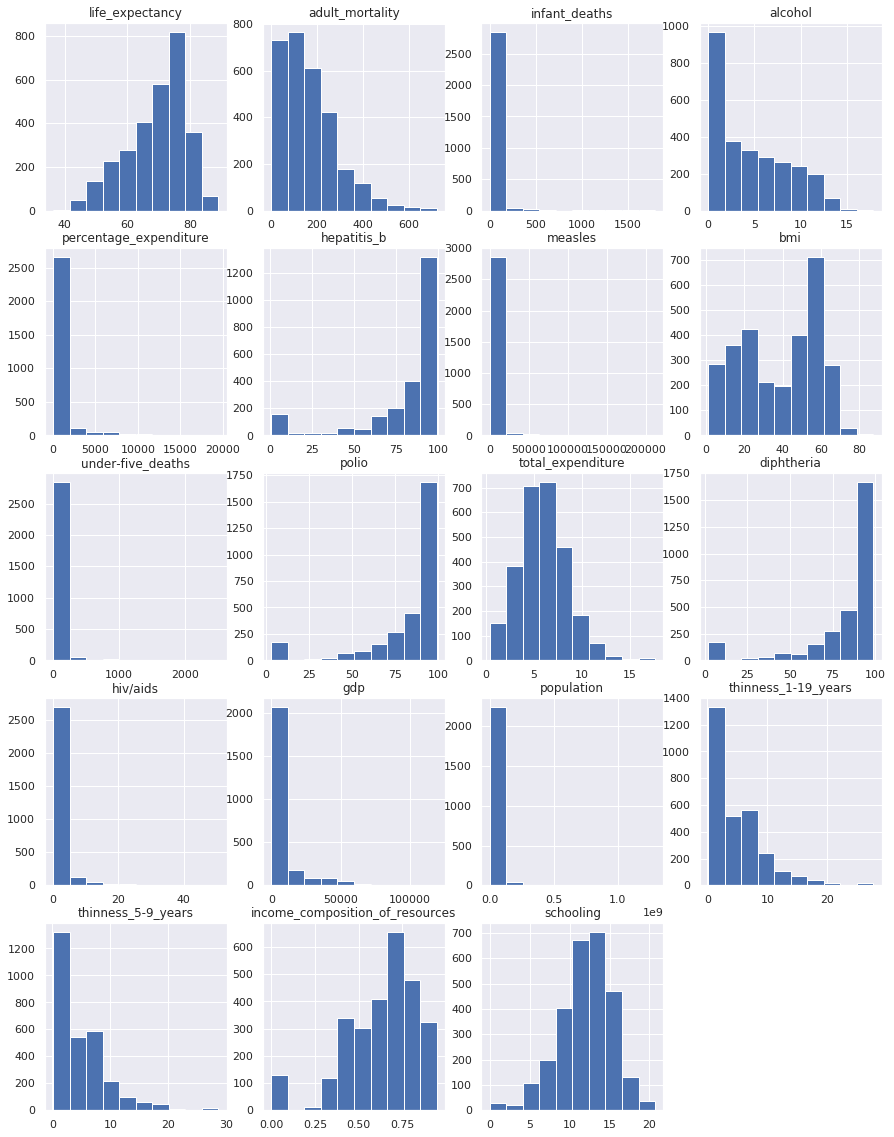

In [197]:
# plot the distribution of numeric features in the dataset

import seaborn as sns; sns.set()

df_pandas = df.toPandas()
plt.figure(figsize = (15, 20))
cols = list(df_pandas.columns)[3:]
for i, col in enumerate(cols, 1):
    plt.subplot(5, 4, i)
    plt.hist(df_pandas[col].dropna())
    plt.title(col)

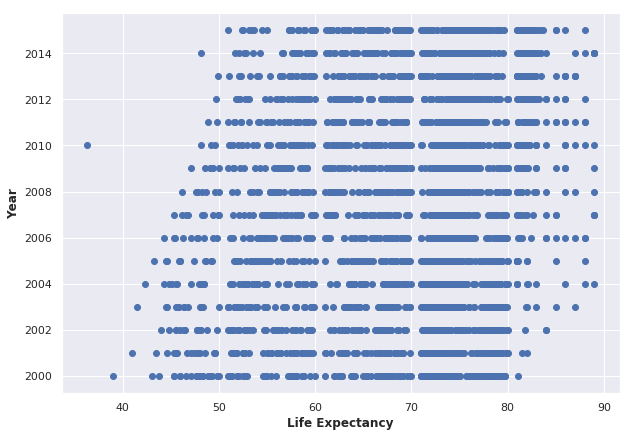

In [198]:
plt.figure(figsize = (10,7))

font = {'weight': 'bold', 'size': 12}

plt.xlabel('Life Expectancy', font)
plt.ylabel('Year', font)

plt.scatter(x=df_pandas["life_expectancy"], y=df_pandas["year"])
plt.show()

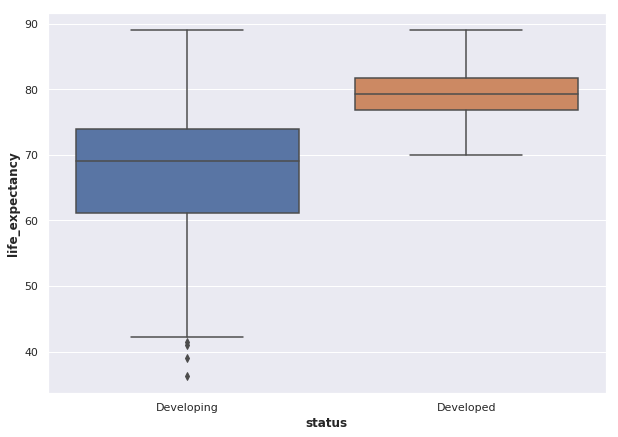

In [199]:
plt.figure(figsize = (10,7))

plt.xlabel('Status', font)
plt.ylabel('Life Expectancy', font)

sns.boxplot('status', 'life_expectancy', data = df_pandas)
plt.show()

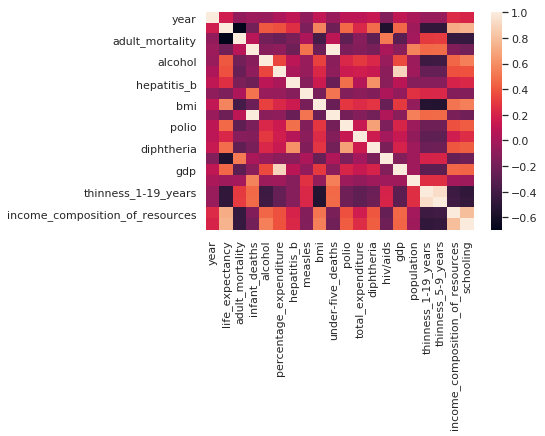

In [200]:
correlation = df_pandas.corr()
sns.heatmap(correlation)

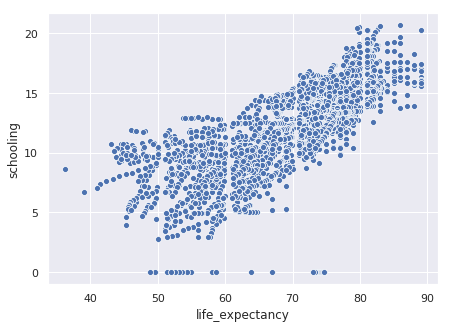

In [201]:
plt.figure(figsize = (7, 5))
sns.scatterplot('life_expectancy', 'schooling', data = df_pandas)

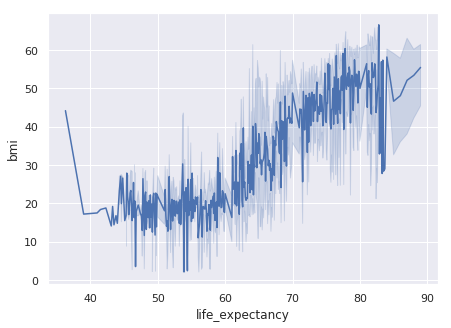

In [202]:
plt.figure(figsize = (7, 5))
sns.lineplot('life_expectancy', 'bmi', data = df_pandas)

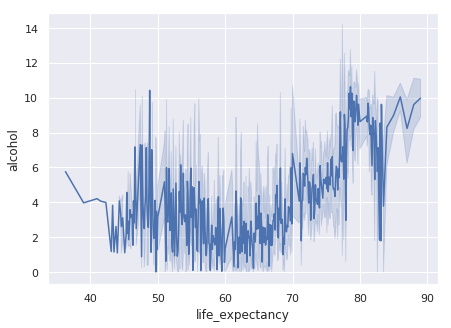

In [203]:
plt.figure(figsize = (7, 5))
sns.lineplot('life_expectancy', 'alcohol', data = df_pandas)

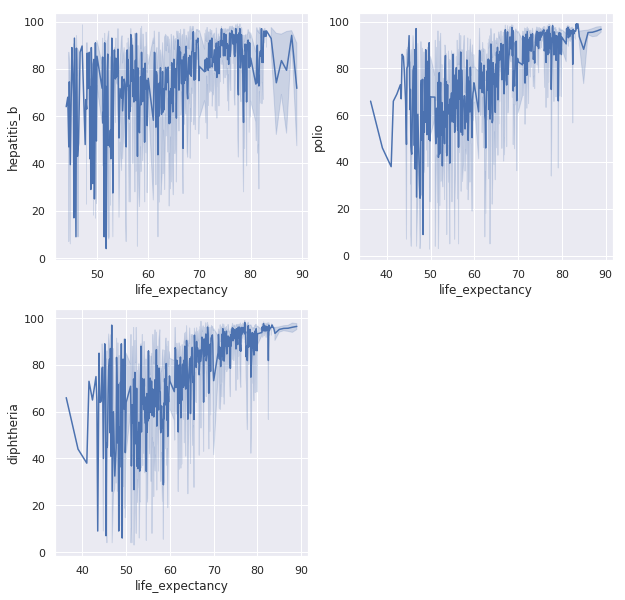

In [204]:
plt.figure(figsize = (10, 10))
plt.subplot(221)
sns.lineplot('life_expectancy', 'hepatitis_b', data = df_pandas)
plt.subplot(222)
sns.lineplot('life_expectancy', 'polio', data = df_pandas)
plt.subplot(223)
sns.lineplot('life_expectancy', 'diphtheria', data = df_pandas)

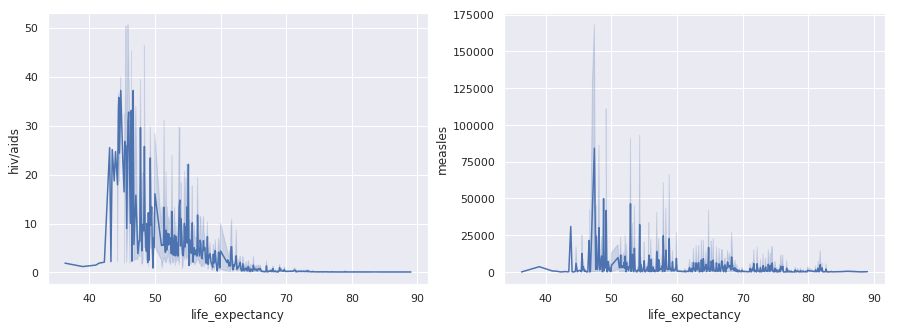

In [205]:
plt.figure(figsize = (15, 5))
plt.subplot(121)
sns.lineplot('life_expectancy', 'hiv/aids', data = df_pandas)
plt.subplot(122)
sns.lineplot('life_expectancy', 'measles', data = df_pandas)

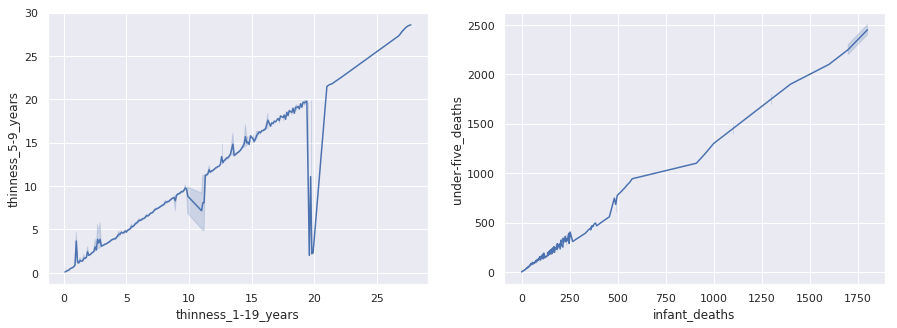

In [206]:
plt.figure(figsize = (15, 5))
plt.subplot(121)
sns.lineplot('thinness_1-19_years', 'thinness_5-9_years', data = df_pandas)
plt.subplot(122)
sns.lineplot('infant_deaths', 'under-five_deaths', data = df_pandas)

In [207]:
# check null values

for c in df.columns:
    null_count = df.filter((df[c] == "") | df[c].isNull() | isnan(df[c])).count()
    print(c + ' has %d null values'%null_count)

country has 0 null values
year has 0 null values
status has 0 null values
life_expectancy has 10 null values
adult_mortality has 10 null values
infant_deaths has 0 null values
alcohol has 194 null values
percentage_expenditure has 0 null values
hepatitis_b has 553 null values
measles has 0 null values
bmi has 34 null values
under-five_deaths has 0 null values
polio has 19 null values
total_expenditure has 226 null values
diphtheria has 19 null values
hiv/aids has 0 null values
gdp has 448 null values
population has 652 null values
thinness_1-19_years has 34 null values
thinness_5-9_years has 34 null values
income_composition_of_resources has 167 null values
schooling has 163 null values


In [208]:
for c in df.columns[4:]:
    print(c + ':  correlation with target is: %.2f' %(df.corr('life_expectancy', c)))

adult_mortality:  correlation with target is: -0.61
infant_deaths:  correlation with target is: -0.18
alcohol:  correlation with target is: 0.36
percentage_expenditure:  correlation with target is: 0.36
hepatitis_b:  correlation with target is: 0.22
measles:  correlation with target is: -0.14
bmi:  correlation with target is: 0.51
under-five_deaths:  correlation with target is: -0.20
polio:  correlation with target is: 0.43
total_expenditure:  correlation with target is: 0.14
diphtheria:  correlation with target is: 0.44
hiv/aids:  correlation with target is: -0.50
gdp:  correlation with target is: 0.40
population:  correlation with target is: -0.02
thinness_1-19_years:  correlation with target is: -0.40
thinness_5-9_years:  correlation with target is: -0.39
income_composition_of_resources:  correlation with target is: 0.58
schooling:  correlation with target is: 0.56


In [209]:
# select features

le = df.drop('population', 'country', 'year',
        'adult_mortality', 'percentage_expenditure', 'gdp', 
        'income_composition_of_resources', 'hepatitis_b', 
        'diphtheria', 'thinness_1-19_years', 'under-five_deaths'
        )
print(le.count(), len(le.columns))
le.show(5)

2938 11
+----------+---------------+-------------+-------+-------+----+-----+-----------------+--------+------------------+---------+
|    status|life_expectancy|infant_deaths|alcohol|measles| bmi|polio|total_expenditure|hiv/aids|thinness_5-9_years|schooling|
+----------+---------------+-------------+-------+-------+----+-----+-----------------+--------+------------------+---------+
|Developing|           65.0|           62|   0.01|   1154|19.1|    6|             8.16|     0.1|              17.3|     10.1|
|Developing|           59.9|           64|   0.01|    492|18.6|   58|             8.18|     0.1|              17.5|     10.0|
|Developing|           59.9|           66|   0.01|    430|18.1|   62|             8.13|     0.1|              17.7|      9.9|
|Developing|           59.5|           69|   0.01|   2787|17.6|   67|             8.52|     0.1|              18.0|      9.8|
|Developing|           59.2|           71|   0.01|   3013|17.2|   68|             7.87|     0.1|              

In [210]:
# check null values in selected features

for c in le.columns:
    null_count = le.filter((le[c] == "") | le[c].isNull() | isnan(le[c])).count()
    null_percent = null_count*100/le.count()
    print(c + ' has %d null values: %.2f %% null' %(null_count, null_percent))

status has 0 null values: 0.00 % null
life_expectancy has 10 null values: 0.34 % null
infant_deaths has 0 null values: 0.00 % null
alcohol has 194 null values: 6.60 % null
measles has 0 null values: 0.00 % null
bmi has 34 null values: 1.16 % null
polio has 19 null values: 0.65 % null
total_expenditure has 226 null values: 7.69 % null
hiv/aids has 0 null values: 0.00 % null
thinness_5-9_years has 34 null values: 1.16 % null
schooling has 163 null values: 5.55 % null


In [211]:
# drop rows with null values

le = le.dropna()
for c in le.columns:
    print(c + ' has %d null values now' %le.filter((le[c] == "") | le[c].isNull() | isnan(le[c])).count())
print(le.count(), len(le.columns))

status has 0 null values now
life_expectancy has 0 null values now
infant_deaths has 0 null values now
alcohol has 0 null values now
measles has 0 null values now
bmi has 0 null values now
polio has 0 null values now
total_expenditure has 0 null values now
hiv/aids has 0 null values now
thinness_5-9_years has 0 null values now
schooling has 0 null values now
2556 11


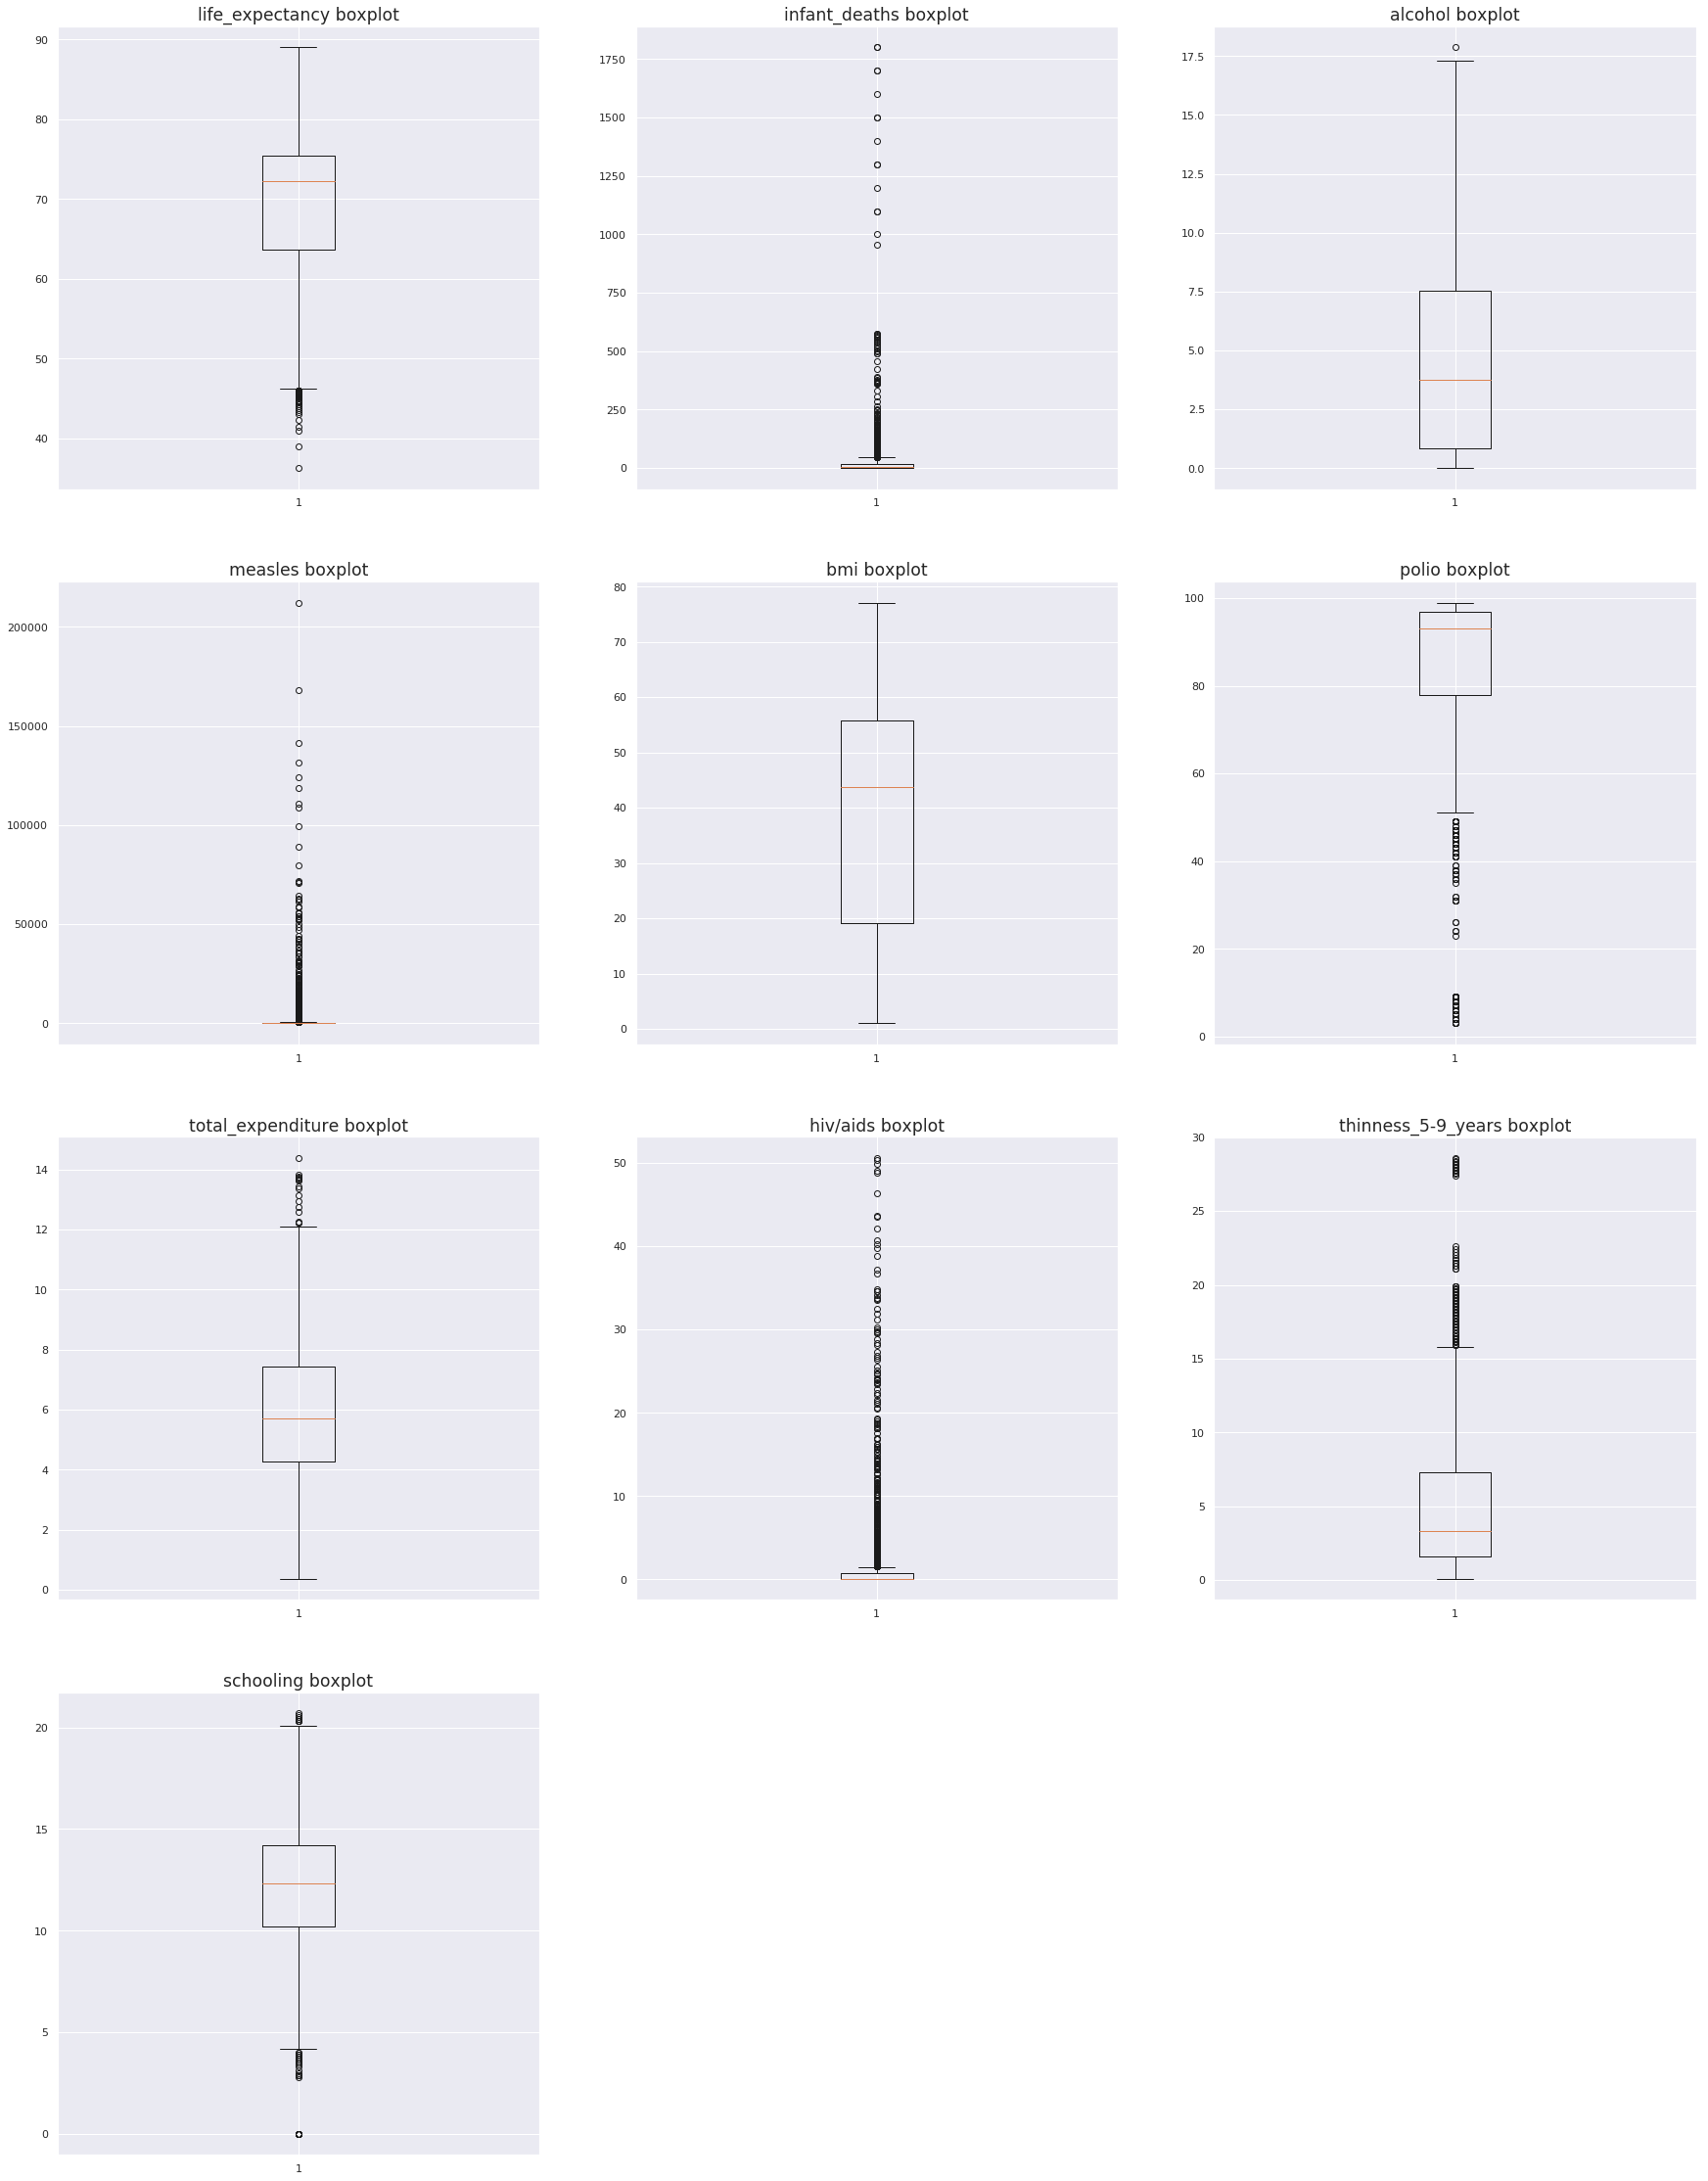

In [212]:
# turn the data into pandas dataframe for further manipulation

le_pandas = le.toPandas()

# detecting outliers in each column

cols = list(le_pandas.columns)[1:]
plt.figure(figsize = (30,40))
i = 0
for col in cols:
    i += 1
    plt.subplot(4, 3, i)
    plt.boxplot(le_pandas[col])
    plt.title('{} boxplot'.format(col), fontsize = 'x-large')
plt.show()

In [213]:
# count outliers in each column

def outlier_count(col, data):
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = outlier_count/len(data[col])*100
    print('Number and percentage of outliers in %s: %d and %.2f%%' %(col, 
        outlier_count, outlier_percent))

for col in cols:
    outlier_count(col, le_pandas)

Number and percentage of outliers in life_expectancy: 41 and 1.60%
Number and percentage of outliers in infant_deaths: 300 and 11.74%
Number and percentage of outliers in alcohol: 1 and 0.04%
Number and percentage of outliers in measles: 469 and 18.35%
Number and percentage of outliers in bmi: 0 and 0.00%
Number and percentage of outliers in polio: 230 and 9.00%
Number and percentage of outliers in total_expenditure: 16 and 0.63%
Number and percentage of outliers in hiv/aids: 504 and 19.72%
Number and percentage of outliers in thinness_5-9_years: 90 and 3.52%
Number and percentage of outliers in schooling: 41 and 1.60%


In [214]:
# winsorize outliers in each column except status which is categorical

from scipy.stats.mstats import winsorize

wins_life_expectancy = winsorize(le_pandas['life_expectancy'], (0.02,0))
wins_infant_deaths = winsorize(le_pandas['infant_deaths'], (0,0.12))
wins_alcohol = winsorize(le_pandas['alcohol'], (0,0.01))
wins_measles = winsorize(le_pandas['measles'], (0,0.19))
wins_bmi = winsorize(le_pandas['bmi'], (0,0))
wins_polio = winsorize(le_pandas['polio'], (0.09,0))
wins_total_expenditure = winsorize(le_pandas['total_expenditure'], (0,0.01))
wins_hiv_aids = winsorize(le_pandas['hiv/aids'], (0,0.2))
wins_thinness_5_to_9_years = winsorize(le_pandas['thinness_5-9_years'], (0,0.04))
wins_schooling = winsorize(le_pandas['schooling'], (0.02,0.01))

wins_le_pd = pd.DataFrame()
wins_le_pd['status'] = le_pandas['status']
wins_le_pd['wins_life_expectancy']= wins_life_expectancy
wins_le_pd['wins_infant_deaths']= wins_infant_deaths
wins_le_pd['wins_alcohol']= wins_alcohol
wins_le_pd['wins_measles']= wins_measles
wins_le_pd['wins_bmi']= wins_bmi
wins_le_pd['wins_polio']= wins_polio
wins_le_pd['wins_total_expenditure']= wins_total_expenditure
wins_le_pd['wins_hiv_aids']= wins_hiv_aids
wins_le_pd['wins_thinness_5_to_9_years']= wins_thinness_5_to_9_years
wins_le_pd['wins_schooling']= wins_schooling
wins_le_pd.shape

(2556, 11)

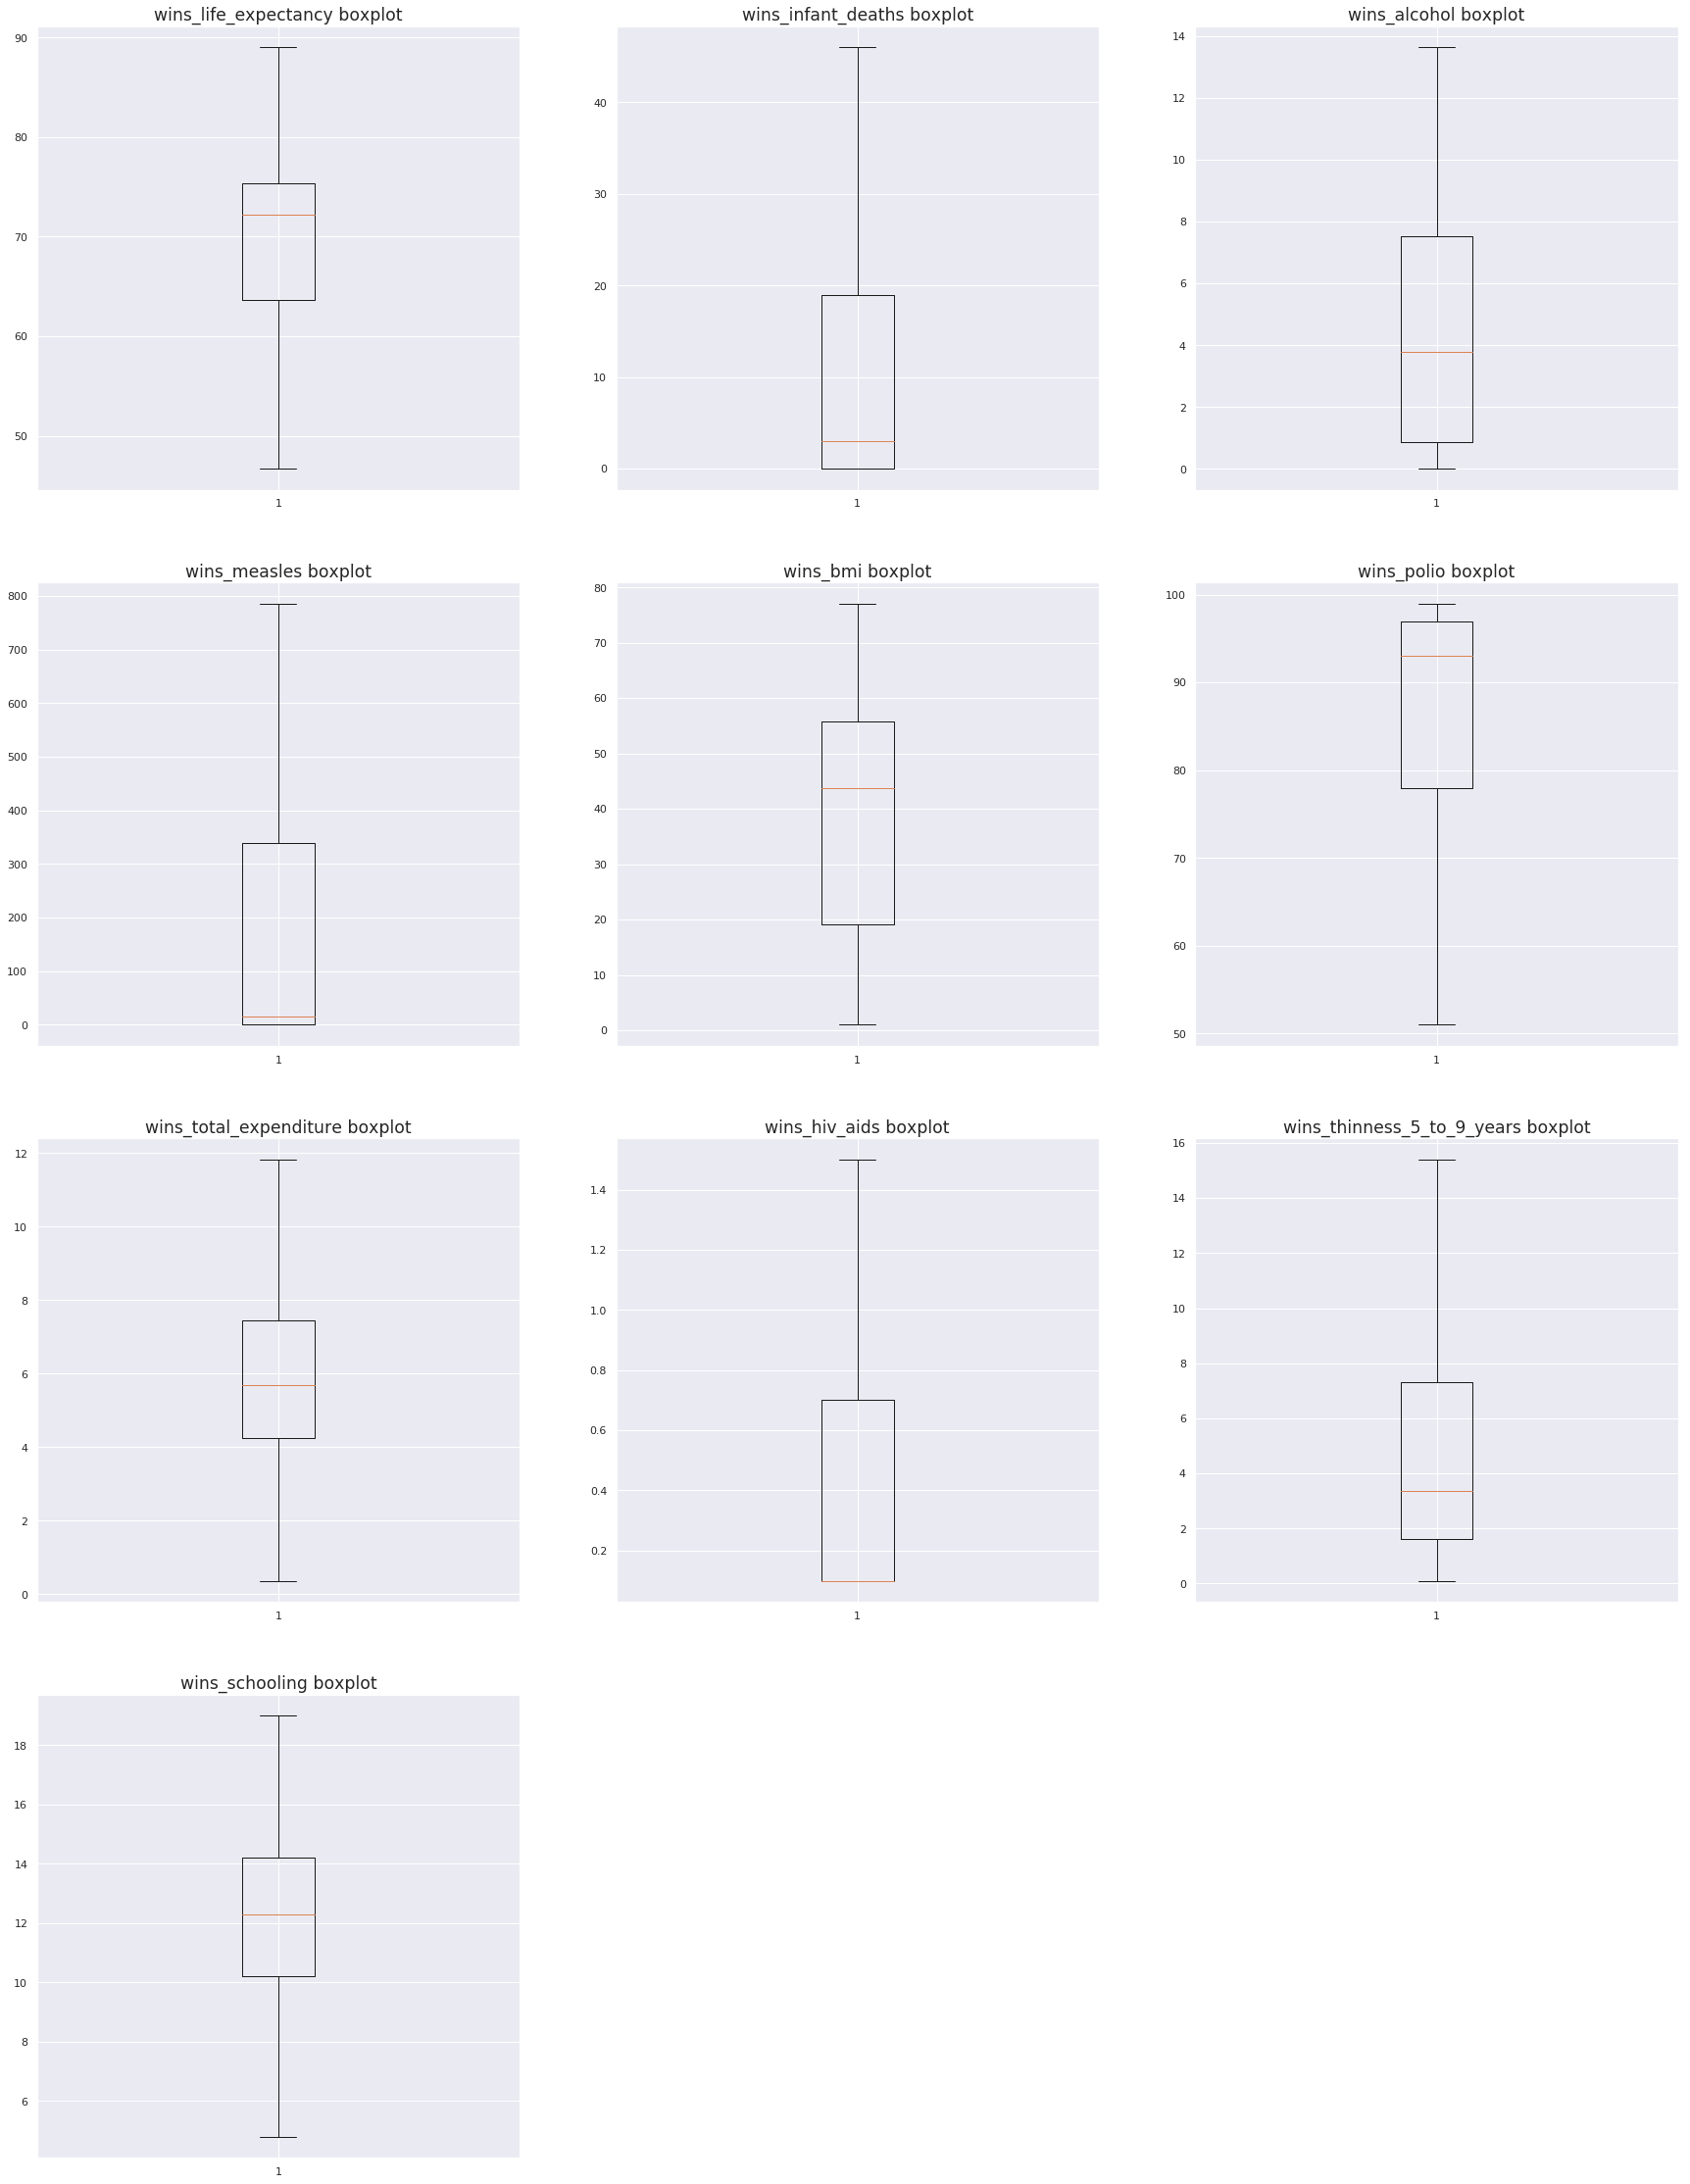

In [215]:
# visualzing winsorized dataset in boxplot to see if all outliers are dealt with

cols = list(wins_le_pd.columns)[1:]
plt.figure(figsize = (30,40))
i = 0
for col in cols:
    i += 1
    plt.subplot(4, 3, i)
    plt.boxplot(wins_le_pd[col])
    plt.title('{} boxplot'.format(col), fontsize = 'x-large')
plt.show()

(array([0, 1]), <a list of 2 Text xticklabel objects>)

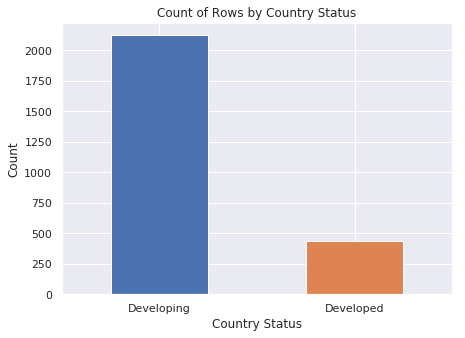

In [216]:
# checking the balanceness of the dataset

plt.figure(figsize = (7,5))
plt.subplot(111)
wins_le_pd.status.value_counts().plot(kind = 'bar')
plt.title('Count of Rows by Country Status')
plt.xlabel('Country Status')
plt.ylabel('Count')
plt.xticks(rotation=0)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

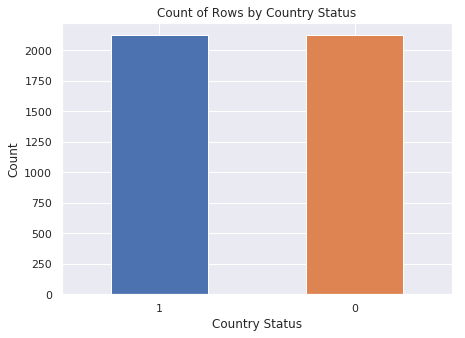

In [217]:
wins_le_boosted = pd.read_csv('dataset/wins_le_boosted.csv')

# checking the balanceness of the dataset

plt.figure(figsize = (7,5))
plt.subplot(111)
wins_le_boosted.status.value_counts().plot(kind = 'bar')
plt.title('Count of Rows by Country Status')
plt.xlabel('Country Status')
plt.ylabel('Count')
plt.xticks(rotation=0)

In [218]:
wins_le_boosted.shape
wins_le_boosted.head()

,wins_life_expectancy,wins_infant_deaths,wins_alcohol,wins_measles,wins_bmi,wins_polio,wins_total_expenditure,wins_hiv_aids,wins_thinness_5_to_9_years,wins_schooling,status
0,65.0,46,0.01,786,19.1,51.0,8.16,0.1,15.4,10.1,1
1,59.9,46,0.01,492,18.6,58.0,8.18,0.1,15.4,10.0,1
2,59.9,46,0.01,430,18.1,62.0,8.13,0.1,15.4,9.9,1
3,59.5,46,0.01,786,17.6,67.0,8.52,0.1,15.4,9.8,1
4,59.2,46,0.01,786,17.2,68.0,7.87,0.1,15.4,9.5,1


In [219]:
# check data format

wins_le_boosted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4242 entries, 0 to 4241
Data columns (total 11 columns):
wins_life_expectancy          4242 non-null float64
wins_infant_deaths            4242 non-null int64
wins_alcohol                  4242 non-null float64
wins_measles                  4242 non-null int64
wins_bmi                      4242 non-null float64
wins_polio                    4242 non-null float64
wins_total_expenditure        4242 non-null float64
wins_hiv_aids                 4242 non-null float64
wins_thinness_5_to_9_years    4242 non-null float64
wins_schooling                4242 non-null float64
status                        4242 non-null int64
dtypes: float64(8), int64(3)
memory usage: 364.6 KB


In [220]:
# reduce unwanted feature 'status'

wins_le_boosted = wins_le_boosted.drop(['status'], axis = 1)
wins_le_boosted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4242 entries, 0 to 4241
Data columns (total 10 columns):
wins_life_expectancy          4242 non-null float64
wins_infant_deaths            4242 non-null int64
wins_alcohol                  4242 non-null float64
wins_measles                  4242 non-null int64
wins_bmi                      4242 non-null float64
wins_polio                    4242 non-null float64
wins_total_expenditure        4242 non-null float64
wins_hiv_aids                 4242 non-null float64
wins_thinness_5_to_9_years    4242 non-null float64
wins_schooling                4242 non-null float64
dtypes: float64(8), int64(2)
memory usage: 331.5 KB


In [221]:
#checking the statistics of the dataset

wins_le_boosted.describe()

,wins_life_expectancy,wins_infant_deaths,wins_alcohol,wins_measles,wins_bmi,wins_polio,wins_total_expenditure,wins_hiv_aids,wins_thinness_5_to_9_years,wins_schooling
count,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.00000,4242.000000,4242.000000,4242.000000
mean,73.227105,7.291608,6.639081,173.896983,43.555951,89.221037,6.48526,0.320886,3.394277,13.565158
std,8.959793,13.816754,4.280233,286.846948,19.450012,13.131434,2.45863,0.476253,3.599305,3.164483
min,46.700000,0.000000,0.010000,0.000000,1.000000,51.000000,0.37000,0.100000,0.100000,4.800000
25%,69.300000,0.000000,2.330000,0.000000,25.400000,87.191431,4.72000,0.100000,0.960453,11.700000
50%,74.985870,1.000000,7.299959,11.000000,53.509099,95.000000,6.65735,0.100000,1.900000,14.109245
75%,79.646692,5.000000,10.458676,190.000000,58.002241,97.000000,8.39000,0.100000,4.500000,15.900000
max,89.000000,46.000000,13.630000,786.000000,77.100000,99.000000,11.83000,1.500000,15.400000,19.000000


In [222]:
# normalize the data

from sklearn.preprocessing import StandardScaler

le_final = wins_le_boosted.drop(['wins_life_expectancy'], axis = 1)

ss = StandardScaler()
le_final = ss.fit_transform(le_final)
le_final = pd.DataFrame(le_final)
le_final.columns = list(wins_le_boosted)[1:]
le_final['wins_life_expectancy'] = wins_le_boosted['wins_life_expectancy']
le_final.to_csv('dataset/le_final.csv')
le_final.describe()


,wins_infant_deaths,wins_alcohol,wins_measles,wins_bmi,wins_polio,wins_total_expenditure,wins_hiv_aids,wins_thinness_5_to_9_years,wins_schooling,wins_life_expectancy
count,4.242000e+03,4.242000e+03,4.242000e+03,4.242000e+03,4.242000e+03,4.242000e+03,4.242000e+03,4242.000000,4242.000000,4242.000000
mean,2.680029e-17,-1.608018e-16,-6.030066e-17,3.752041e-16,-3.216035e-16,-2.412026e-16,8.040088e-17,0.000000,0.000000,73.227105
std,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118,1.000118,8.959793
min,-5.277989e-01,-1.548949e+00,-6.063076e-01,-2.188223e+00,-2.910995e+00,-2.487556e+00,-4.638554e-01,-0.915362,-2.770181,46.700000
25%,-5.277989e-01,-1.006859e+00,-6.063076e-01,-9.335774e-01,-1.545790e-01,-7.180698e-01,-4.638554e-01,-0.676273,-0.589473,69.300000
50%,-4.554145e-01,1.544205e-01,-5.679551e-01,5.117900e-01,4.401381e-01,7.000280e-02,-4.638554e-01,-0.415206,0.171956,74.985870
75%,-1.658767e-01,8.924853e-01,5.614463e-02,7.428270e-01,5.924624e-01,7.748074e-01,-4.638554e-01,0.307241,0.737914,79.646692
max,2.801885e+00,1.633496e+00,2.134153e+00,1.724832e+00,7.447866e-01,2.174126e+00,2.476107e+00,3.335960,1.717653,89.000000


In [223]:
le_spark = spark.read.csv('dataset/le_final.csv', inferSchema=True, header=True).drop('_c0')
le_spark.printSchema()

root
 |-- wins_infant_deaths: double (nullable = true)
 |-- wins_alcohol: double (nullable = true)
 |-- wins_measles: double (nullable = true)
 |-- wins_bmi: double (nullable = true)
 |-- wins_polio: double (nullable = true)
 |-- wins_total_expenditure: double (nullable = true)
 |-- wins_hiv_aids: double (nullable = true)
 |-- wins_thinness_5_to_9_years: double (nullable = true)
 |-- wins_schooling: double (nullable = true)
 |-- wins_life_expectancy: double (nullable = true)



In [224]:
# combine features into one vector named features and transform the data

from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(
    inputCols = ['wins_infant_deaths', 
               'wins_alcohol', 
               'wins_measles', 
               'wins_bmi', 
               'wins_polio', 
               'wins_total_expenditure', 
               'wins_hiv_aids', 
               'wins_thinness_5_to_9_years', 
               'wins_schooling'], 
    outputCol = 'features')
output = assembler.transform(le_spark)
le_spark = output.select('features', 'wins_life_expectancy')
le_spark.dtypes

[('features', 'vector'), ('wins_life_expectancy', 'double')]

In [225]:
# training and test sets split 80/20

(train_data, test_data) = le_spark.randomSplit([0.8, 0.2])
train_data.describe().show()
test_data.describe().show()

+-------+--------------------+
|summary|wins_life_expectancy|
+-------+--------------------+
|  count|                3405|
|   mean|   73.14995111761698|
| stddev|   8.988403743444412|
|    min|                46.7|
|    max|                89.0|
+-------+--------------------+

+-------+--------------------+
|summary|wins_life_expectancy|
+-------+--------------------+
|  count|                 837|
|   mean|   73.54097331575612|
| stddev|   8.840822431594608|
|    min|                46.7|
|    max|                89.0|
+-------+--------------------+



In [226]:
# evaluation metrics

from pyspark.ml.evaluation import RegressionEvaluator

evaluator_rmse = RegressionEvaluator(labelCol="wins_life_expectancy", 
                                     predictionCol="prediction", 
                                     metricName="rmse")
evaluator_mae = RegressionEvaluator(labelCol="wins_life_expectancy", 
                                    predictionCol="prediction", 
                                    metricName="mae")
evaluator_r2 = RegressionEvaluator(labelCol="wins_life_expectancy", 
                                   predictionCol="prediction", 
                                   metricName="r2")

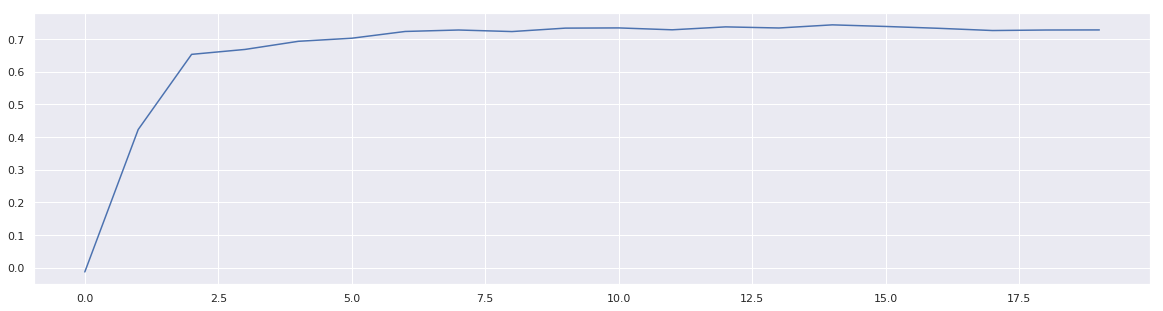

In [227]:
# DecisionTree algorithm parameter tuning

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from spark_sklearn import *

X = le_final.drop('wins_life_expectancy', axis=1)
y = le_final['wins_life_expectancy']

score0 = []
for i in range(0,20,1):
    dt_test = DecisionTreeRegressor(max_depth=i+1,
                                 random_state=42)
    score = cross_val_score(dt_test,X,y,cv=5).mean()
    score0.append(score)

plt.figure(figsize=[20,5])
plt.plot(score0)
plt.show()

In [228]:
# setting DecisionTree parameters

from pyspark.ml.regression import DecisionTreeRegressor

dt = DecisionTreeRegressor(labelCol='wins_life_expectancy', 
                           featuresCol='features', maxDepth=8)

In [229]:
# train a Decision Tree model

dt_model = dt.fit(train_data)

dt_predict = dt_model.transform(test_data)
dt_predict.show(5)

+--------------------+--------------------+-----------------+
|            features|wins_life_expectancy|       prediction|
+--------------------+--------------------+-----------------+
|[-0.5277988940798...|                77.6|73.32003117706617|
|[-0.5277988940798...|                78.2|78.18000000000002|
|[-0.5277988940798...|                66.9|             69.1|
|[-0.5277988940798...|                74.1|73.32003117706617|
|[-0.5277988940798...|                68.8|70.68124999999999|
+--------------------+--------------------+-----------------+
only showing top 5 rows



In [230]:
# display the DecisionTree structure

#print(dt_model.toDebugString)

In [231]:
# output of the DT model

dt_rmse = evaluator_rmse.evaluate(dt_predict)
dt_mae = evaluator_mae.evaluate(dt_predict)
dt_r2 = evaluator_r2.evaluate(dt_predict)
print("Decision Tree: Root Mean Squared Error (RMSE) on test data = %g" % dt_rmse)
print("Decision Tree: Mean Absolute Error (MAE) on test data = %g" % dt_mae)
print("Decision Tree: R2 on test data = %g" % dt_r2)

Decision Tree: Root Mean Squared Error (RMSE) on test data = 2.63668
Decision Tree: Mean Absolute Error (MAE) on test data = 1.82724
Decision Tree: R2 on test data = 0.910947


In [232]:
!pip3 install spark_sklearn

DEPRECATION: Python 3.5 reached the end of its life on September 13th, 2020. Please upgrade your Python as Python 3.5 is no longer maintained. pip 21.0 will drop support for Python 3.5 in January 2021. pip 21.0 will remove support for this functionality.
Defaulting to user installation because normal site-packages is not writeable


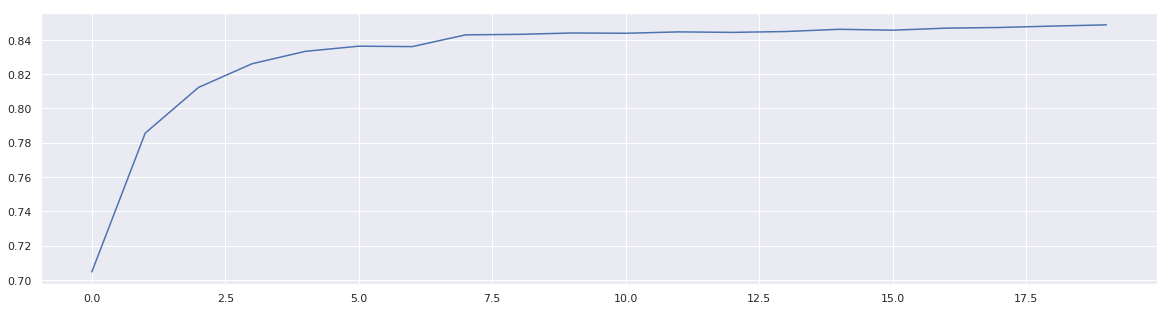

In [233]:
# Random Forest algorithm parameter tuning

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from spark_sklearn import *

X = le_final.drop('wins_life_expectancy', axis=1)
y = le_final['wins_life_expectancy']

scorel = []
for i in range(0,20,1):
    rf_test = RandomForestRegressor(n_estimators=i+1,
                                 n_jobs=-1,
                                 random_state=42)
    score = cross_val_score(rf_test,X,y,cv=5).mean()
    scorel.append(score)

plt.figure(figsize=[20,5])
plt.plot(scorel)
plt.show()


In [234]:
# Random Forest model parameters setting

from pyspark.ml.regression import RandomForestRegressor

rf = RandomForestRegressor(labelCol='wins_life_expectancy', 
                           featuresCol='features',
                           numTrees=10)


In [235]:
# train a Random Forest model

rf_model = rf.fit(train_data)

rf_predict = rf_model.transform(test_data)
rf_predict.show(5)

+--------------------+--------------------+-----------------+
|            features|wins_life_expectancy|       prediction|
+--------------------+--------------------+-----------------+
|[-0.5277988940798...|                77.6|73.84098188816347|
|[-0.5277988940798...|                78.2|74.03843716519414|
|[-0.5277988940798...|                66.9|70.50186992621653|
|[-0.5277988940798...|                74.1|73.97725816584536|
|[-0.5277988940798...|                68.8|71.78951827771738|
+--------------------+--------------------+-----------------+
only showing top 5 rows



In [236]:
# output of the RF model

rf_rmse = evaluator_rmse.evaluate(rf_predict)
rf_mae = evaluator_mae.evaluate(rf_predict)
rf_r2 = evaluator_r2.evaluate(rf_predict)
print("Random Forest: Root Mean Squared Error (RMSE) on test data = %g" % rf_rmse)
print("Random Forest: Mean Absolute Error (MAE) on test data = %g" % rf_mae)
print("Random Forest: R2 on test data = %g" % rf_r2)

Random Forest: Root Mean Squared Error (RMSE) on test data = 2.992
Random Forest: Mean Absolute Error (MAE) on test data = 2.21347
Random Forest: R2 on test data = 0.885328


In [237]:
# Linear Regression parameter setting

from pyspark.ml.regression import LinearRegression

lr = LinearRegression(labelCol='wins_life_expectancy', 
                      featuresCol='features', 
                      fitIntercept=True,
                      standardization=False)


In [238]:
# train the Linear Regression model

lr_model = lr.fit(train_data)
lr_predict = lr_model.transform(test_data)
lr_predict.show(5)

+--------------------+--------------------+-----------------+
|            features|wins_life_expectancy|       prediction|
+--------------------+--------------------+-----------------+
|[-0.5277988940798...|                77.6|71.12559680565195|
|[-0.5277988940798...|                78.2|72.00275725943143|
|[-0.5277988940798...|                66.9|69.33224904329185|
|[-0.5277988940798...|                74.1|76.16566368100153|
|[-0.5277988940798...|                68.8|72.39779027102037|
+--------------------+--------------------+-----------------+
only showing top 5 rows



In [239]:
# Print the coefficients and intercept for linear regression

print("Coefficients: {} \nIntercept: {}".format(lr_model.coefficients,lr_model.intercept))

Coefficients: [-1.0231314304095265,-0.39320750382165615,0.5414829690304799,-0.05666960265610698,0.8075578668019916,0.12704373556405116,-3.5548478098590186,-1.264655892853129,3.559714568281768] 
Intercept: 73.19960423960576


In [240]:
# output of the LR model

lr_rmse = evaluator_rmse.evaluate(lr_predict)
lr_mae = evaluator_mae.evaluate(lr_predict)
lr_r2 = evaluator_r2.evaluate(lr_predict)
print("Random Forest: Root Mean Squared Error (RMSE) on test data = %g" % lr_rmse)
print("Random Forest: Mean Absolute Error (MAE) on test data = %g" % lr_mae)
print("Random Forest: R2 on test data = %g" % lr_r2)

Random Forest: Root Mean Squared Error (RMSE) on test data = 3.76362
Random Forest: Mean Absolute Error (MAE) on test data = 2.85544
Random Forest: R2 on test data = 0.818555


In [241]:
# collect the evaluation metrics and compare

evaluation = {'Decision Tree':[dt_r2, dt_rmse, dt_mae], 
              'random forest':[rf_r2, rf_rmse, rf_mae],
              'linear regression':[lr_r2, lr_rmse, lr_mae]
             }
evaluation = pd.DataFrame(evaluation)
evaluation.index = ['r2 score', 'rmse score', 'mae']
evaluation

,Decision Tree,linear regression,random forest
r2 score,0.910947,0.818555,0.885328
rmse score,2.636682,3.763621,2.992000
mae,1.827242,2.855441,2.213469


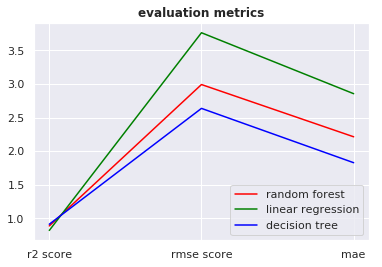

In [242]:
# visualize the modeling results

plt.plot(evaluation['random forest'], 'red', label = 'random forest')
plt.plot(evaluation['linear regression'], 'green', label = 'linear regression')
plt.plot(evaluation['Decision Tree'], 'blue', label = 'decision tree')
plt.title('evaluation metrics', loc = 'center', fontweight = 'bold')
plt.legend()
plt.show()

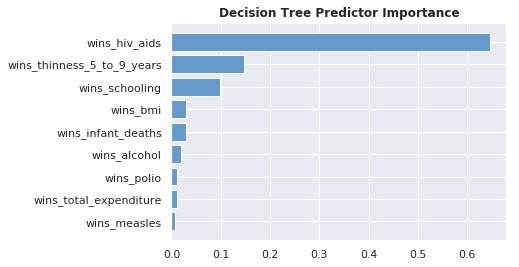

In [243]:
# DT model predictor importance 

dt_importance = pd.DataFrame(dt_model.featureImportances.toArray())

features = le_final.drop(['wins_life_expectancy'], axis =1)
dt_importance.index = list(features.columns)
dt_importance.columns = ['importance']
dt_importance = dt_importance.sort_values(by = 'importance')

fig, ax = plt.subplots()
b = ax.barh(range(len(dt_importance)), dt_importance['importance'], color='#6699CC')

for rect in b:
    w = rect.get_width()
    
ax.set_yticks(range(len(dt_importance)))
ax.set_yticklabels(dt_importance.index)
plt.title('Decision Tree Predictor Importance', loc='center', fontweight='bold')
plt.show()

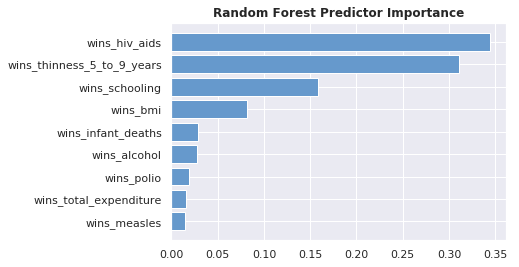

In [244]:
# RF model predictor importance 

rf_importance = pd.DataFrame(rf_model.featureImportances.toArray())

features = le_final.drop(['wins_life_expectancy'], axis =1)
rf_importance.index = list(features.columns)
rf_importance.columns = ['importance']
rf_importance = rf_importance.sort_values(by = 'importance')

fig, ax = plt.subplots()
b = ax.barh(range(len(rf_importance)), rf_importance['importance'], color='#6699CC')

for rect in b:
    w = rect.get_width()
    
ax.set_yticks(range(len(rf_importance)))
ax.set_yticklabels(dt_importance.index)
plt.title('Random Forest Predictor Importance', loc='center', fontweight='bold')
plt.show()

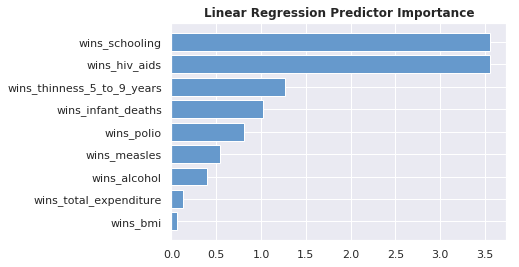

In [245]:
# LR model predictor importance 

coefs = lr_model.coefficients.toArray()
importance = []
for coef in coefs:
    if coef < 0:
        importance.append(-coef)
    else: importance.append(coef)
lr_importance = pd.DataFrame(importance)

features = le_final.drop(['wins_life_expectancy'], axis =1)
lr_importance.index = list(features.columns)
lr_importance.columns = ['importance']
lr_importance = lr_importance.sort_values(by = 'importance')

fig, ax = plt.subplots()
b = ax.barh(range(len(lr_importance)), lr_importance['importance'], color='#6699CC')

for rect in b:
    w = rect.get_width()
    
ax.set_yticks(range(len(lr_importance)))
ax.set_yticklabels(lr_importance.index)
plt.title('Linear Regression Predictor Importance', loc='center', fontweight='bold')
plt.show()

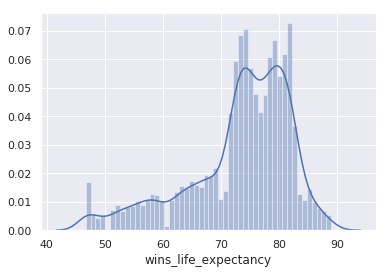

In [246]:
sns.distplot(le_final['wins_life_expectancy'], bins = 50)
plt.show()

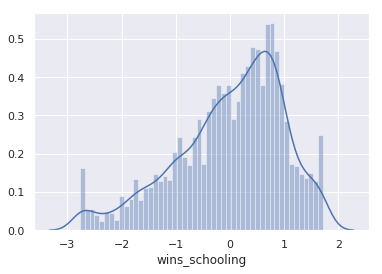

In [247]:
sns.distplot(le_final['wins_schooling'], bins = 50)
plt.show()

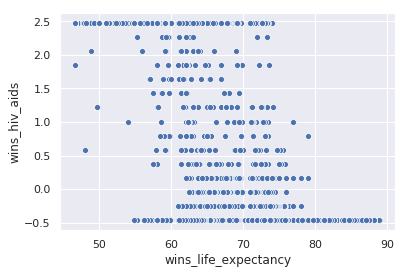

In [248]:
sns.scatterplot(le_final['wins_life_expectancy'], le_final['wins_hiv_aids'])
plt.show()

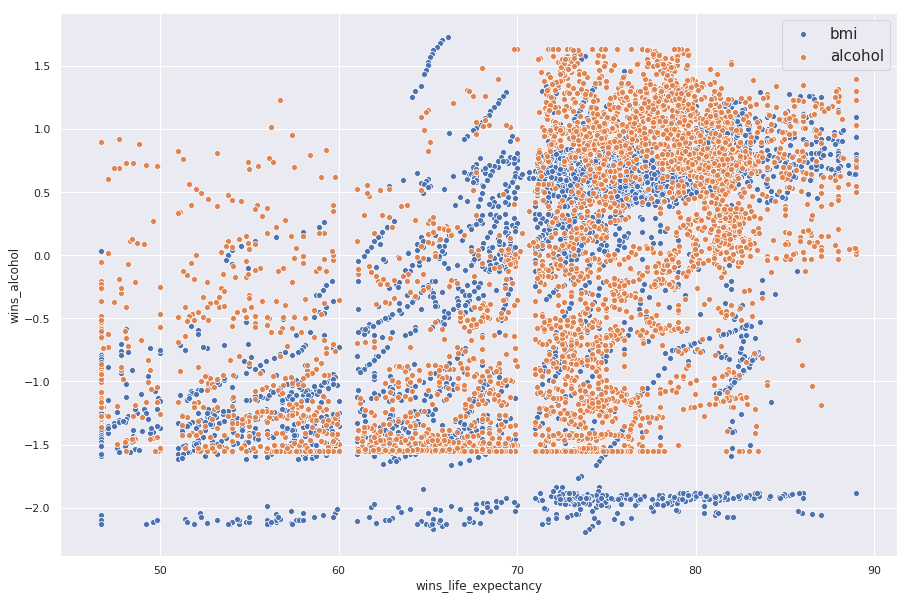

In [249]:
plt.figure(figsize = (15,10))
sns.scatterplot('wins_life_expectancy', 'wins_bmi', data = le_final, label = 'bmi')
sns.scatterplot('wins_life_expectancy', 'wins_alcohol', data = le_final, label = 'alcohol')
plt.legend(fontsize = 15)
plt.show()

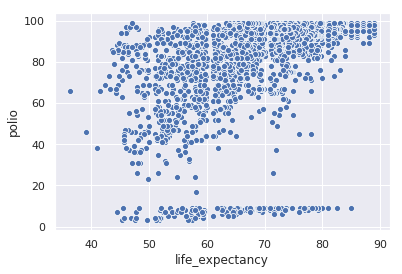

In [250]:
sns.scatterplot('life_expectancy', 'polio', data = df_pandas)

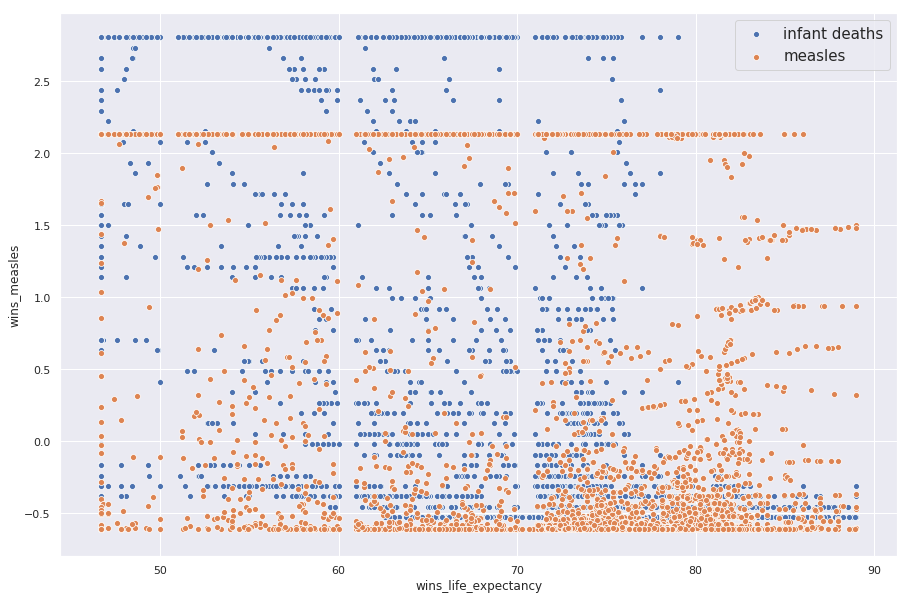

In [251]:
plt.figure(figsize = (15,10))
sns.scatterplot('wins_life_expectancy', 'wins_infant_deaths', data = le_final, label = 'infant deaths')
sns.scatterplot('wins_life_expectancy', 'wins_measles', data = le_final, label = 'measles')
plt.legend(fontsize = 15)
plt.show()

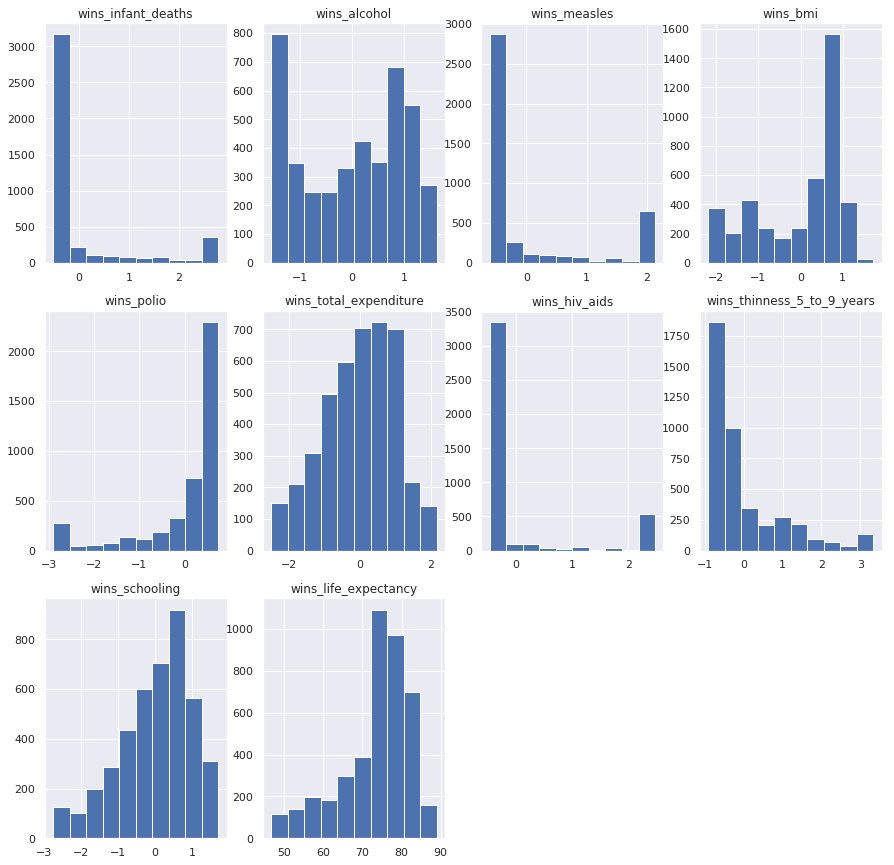

In [254]:
# plot the distribution of scaled features

plt.figure(figsize = (15, 15))
cols = list(le_final.columns)
for i, col in enumerate(cols, 1):
    plt.subplot(3, 4, i)
    plt.hist(le_final[col])
    plt.title(col)

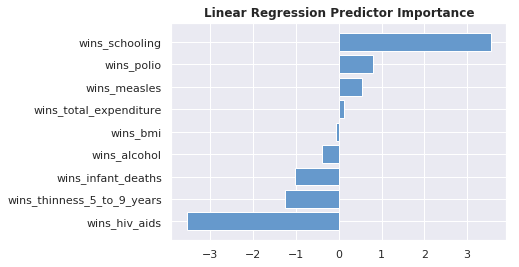

In [255]:
# LR model coefficients

coefs = lr_model.coefficients.toArray()
lr_importance = pd.DataFrame(coefs)

features = le_final.drop(['wins_life_expectancy'], axis =1)
lr_importance.index = list(features.columns)
lr_importance.columns = ['importance']
lr_importance = lr_importance.sort_values(by = 'importance')

fig, ax = plt.subplots()
b = ax.barh(range(len(lr_importance)), lr_importance['importance'], color='#6699CC')

for rect in b:
    w = rect.get_width()
    
ax.set_yticks(range(len(lr_importance)))
ax.set_yticklabels(lr_importance.index)
plt.title('Linear Regression Predictor Importance', loc='center', fontweight='bold')
plt.show()